<a href="https://colab.research.google.com/github/DSamson24/Big_Mart_Sales/blob/master/Big_Mart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Necessary Libraries**

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

**Importing DataSets**

In [0]:
bigmart=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Big_Mart/train.csv')
bigmart_test=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Big_Mart/test.csv')

In [0]:
bigmart.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


**Data Audit**

In [0]:
bigmart['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [0]:
bigmart['Item_Fat_Content']=bigmart['Item_Fat_Content'].replace(['LF','low fat'],'Low Fat')
bigmart['Item_Fat_Content']=bigmart['Item_Fat_Content'].replace('reg','Regular')

In [0]:
bigmart['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

**Imputation of Missing Value**

In [0]:
bigmart.isnull().any()

Item_Identifier              False
Item_Weight                   True
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

In [0]:
bigmart['Item_Weight'].isnull().sum()

1463

Item weight depends on Item_Identifier, so filling NAs accordingly

In [0]:
bigmart['Item_Weight']=bigmart.groupby('Item_Identifier')['Item_Weight'].transform(lambda x:x.fillna(x.mean()))
bigmart['Item_Weight'].isnull().sum()

4

In [0]:
bigmart['Item_Weight']=bigmart['Item_Weight'].fillna(bigmart['Item_Weight'].mean())
bigmart['Item_Weight'].isnull().sum()

0

Outlet size depends on Outlet_Type, Outlet_Location_Type. So imputing based on that

In [0]:
bigmart['Outlet_Size'].isnull().sum()

2410

In [0]:
bigmart['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [0]:
bigmart.groupby('Outlet_Identifier')['Outlet_Size'].count() 

Outlet_Identifier
OUT010      0
OUT013    932
OUT017      0
OUT018    928
OUT019    528
OUT027    935
OUT035    930
OUT045      0
OUT046    930
OUT049    930
Name: Outlet_Size, dtype: int64

In [0]:
bigmart.groupby('Outlet_Location_Type')['Outlet_Size'].count()

Outlet_Location_Type
Tier 1    2388
Tier 2     930
Tier 3    2795
Name: Outlet_Size, dtype: int64

In [0]:
bigmart.groupby('Outlet_Type')['Outlet_Size'].count()

Outlet_Type
Grocery Store         528
Supermarket Type1    3722
Supermarket Type2     928
Supermarket Type3     935
Name: Outlet_Size, dtype: int64

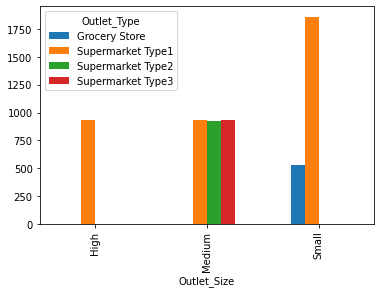

In [0]:
table=pd.crosstab(bigmart['Outlet_Size'],bigmart['Outlet_Type'])
table
table.plot(kind='bar')

In [0]:
bigmart.groupby(['Outlet_Type','Outlet_Location_Type','Outlet_Size'])['Outlet_Size'].count()

Outlet_Type        Outlet_Location_Type  Outlet_Size
Grocery Store      Tier 1                Small          528
Supermarket Type1  Tier 1                Medium         930
                                         Small          930
                   Tier 2                Small          930
                   Tier 3                High           932
Supermarket Type2  Tier 3                Medium         928
Supermarket Type3  Tier 3                Medium         935
Name: Outlet_Size, dtype: int64

In [0]:
bigmart.groupby(['Outlet_Type','Outlet_Location_Type'])['Outlet_Size'].count()

Outlet_Type        Outlet_Location_Type
Grocery Store      Tier 1                   528
                   Tier 3                     0
Supermarket Type1  Tier 1                  1860
                   Tier 2                   930
                   Tier 3                   932
Supermarket Type2  Tier 3                   928
Supermarket Type3  Tier 3                   935
Name: Outlet_Size, dtype: int64

In [0]:
bigmart['Outlet_Size'].loc[bigmart['Outlet_Type']== 'Grocery Store']=bigmart['Outlet_Size'].loc[bigmart['Outlet_Type']== 'Grocery Store'].fillna('Small')

In [0]:
bigmart['Outlet_Size'].loc[bigmart['Outlet_Type']== 'Supermarket Type1']=bigmart['Outlet_Size'].loc[bigmart['Outlet_Type']== 'Supermarket Type1'].fillna('Small')

In [0]:
bigmart['Outlet_Size'].isnull().sum()

0

**Data Visualization**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

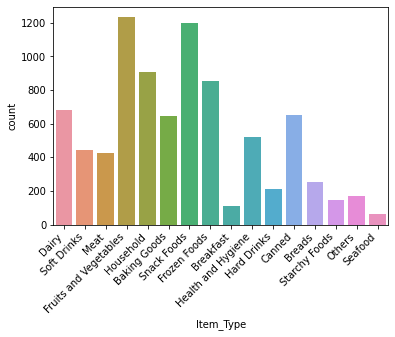

In [0]:
sns.countplot(bigmart['Item_Type'])
plt.xticks(rotation=45,ha='right')

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

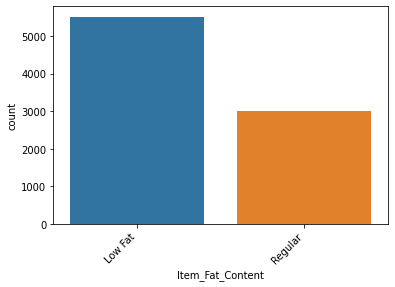

In [0]:
sns.countplot(bigmart['Item_Fat_Content'])
plt.xticks(rotation=45,ha='right')

(array([   0,    1,    2, ..., 1556, 1557, 1558]),
 <a list of 1559 Text major ticklabel objects>)

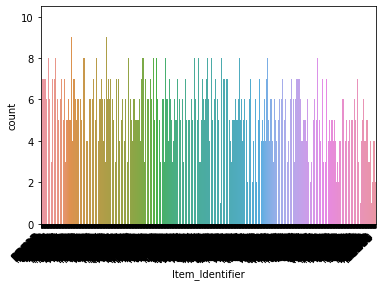

In [0]:
sns.countplot(bigmart['Item_Identifier'])
plt.xticks(rotation=45,ha='right')

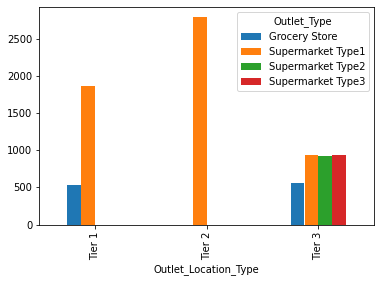

In [0]:
table1=pd.crosstab(bigmart['Outlet_Location_Type'],bigmart['Outlet_Type'])
table1.plot(kind='bar')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

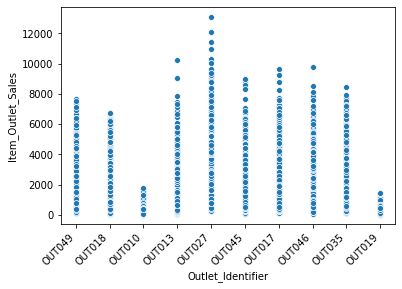

In [0]:
sns.scatterplot(bigmart['Outlet_Identifier'],bigmart['Item_Outlet_Sales'])
plt.xticks(rotation=45,ha='right')

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

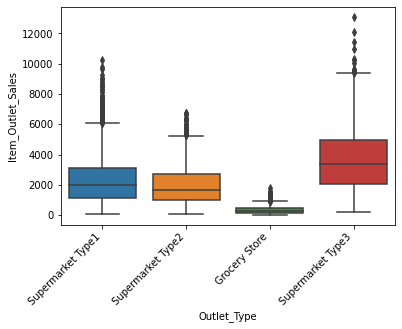

In [0]:
sns.boxplot(bigmart['Outlet_Type'],bigmart['Item_Outlet_Sales'])
plt.xticks(rotation=45,ha='right')

([0, 1, 2], <a list of 3 Text major ticklabel objects>)

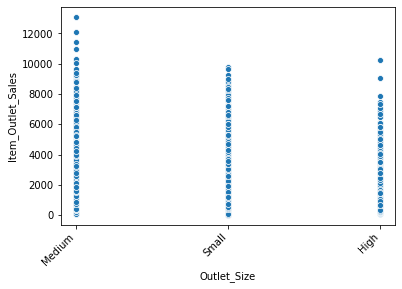

In [0]:
sns.scatterplot(bigmart['Outlet_Size'],bigmart['Item_Outlet_Sales'])
plt.xticks(rotation=45,ha='right')

([0, 1, 2, 3], <a list of 4 Text major ticklabel objects>)

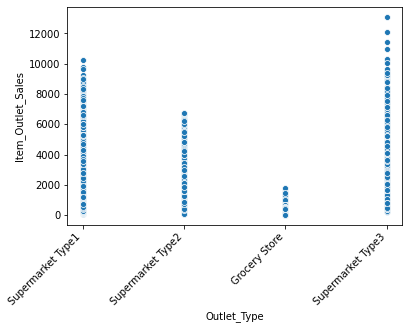

In [0]:
sns.scatterplot(bigmart['Outlet_Type'],bigmart['Item_Outlet_Sales'])
plt.xticks(rotation=45,ha='right')

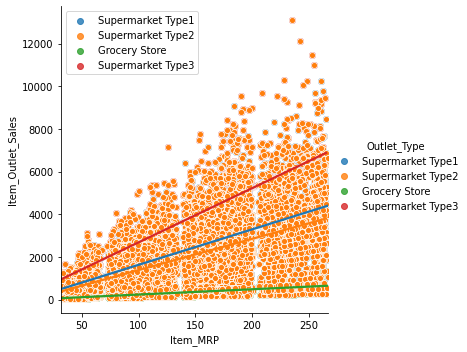

In [0]:
correlation=bigmart.corr()
sns.lmplot(x='Item_MRP', y='Item_Outlet_Sales',hue='Outlet_Type', data=bigmart);
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',data=bigmart)

**Creation of New variable from Outlet_Establishment_Yeat**

In [0]:
bigmart['Outlet_Years_Of_Sales']=pd.datetime.now().year-bigmart['Outlet_Establishment_Year']
del bigmart['Outlet_Establishment_Year']

**Label Encoding**

In [0]:
def categorical_variable(dataframe):
    le = LabelEncoder()
    variable_na me=[i for i in dataframe.columns if dataframe.dtypes[i]=='object']
    dataframe[variable_name] = dataframe[variable_name].apply(lambda col: le.fit_transform(col))
    dataframe[variable_name] = dataframe[variable_name].apply(lambda col: col.astype('category'))
    return dataframe


In [0]:
categorical_variable(bigmart)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years_Of_Sales
0,156,9.300,0,0.016047,4,249.8092,9,1,0,1,3735.1380,21
1,8,5.920,1,0.019278,14,48.2692,3,1,2,2,443.4228,11
2,662,17.500,0,0.016760,10,141.6180,9,1,0,1,2097.2700,21
3,1121,19.200,1,0.000000,6,182.0950,0,2,2,0,732.3800,22
4,1297,8.930,0,0.000000,9,53.8614,1,0,2,1,994.7052,33
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,0,2,1,2778.3834,33
8519,897,8.380,1,0.046982,0,108.1570,7,2,1,1,549.2850,18
8520,1357,10.600,0,0.035186,8,85.1224,6,2,1,1,1193.1136,16
8521,681,7.210,1,0.145221,13,103.1332,3,1,2,2,1845.5976,11


**Creation of X and Y**

In [0]:
Y=bigmart['Item_Outlet_Sales']
X=bigmart.drop('Item_Outlet_Sales',axis=1)

In [0]:
skewness=X.skew()
skewness

Item_Identifier         -0.008877
Item_Weight              0.070332
Item_Fat_Content         0.616705
Item_Visibility          1.167091
Item_Type                0.101655
Item_MRP                 0.127202
Outlet_Identifier       -0.059861
Outlet_Size             -0.861866
Outlet_Location_Type    -0.209093
Outlet_Type              0.927438
Outlet_Years_Of_Sales    0.396641
dtype: float64

**Creation of train and test**

In [0]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=123)

**Normalization using MinMaxScaler**

In [0]:
scaler=MinMaxScaler()

In [0]:
column_names_to_normalize = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Years_Of_Sales']

In [0]:
col = x_train[column_names_to_normalize].values
x_train_scaled = scaler.fit_transform(col)
x_train_1 = pd.DataFrame(x_train_scaled, columns=column_names_to_normalize, index = x_train.index)
x_train[column_names_to_normalize] = x_train_1

In [0]:
col = x_test[column_names_to_normalize].values
x_test_scaled = scaler.fit_transform(col)
x_test_1 = pd.DataFrame(x_test_scaled, columns=column_names_to_normalize, index = x_test.index)
x_test[column_names_to_normalize] = x_test_1

**Building a Model**

In [0]:
model=LinearRegression()

In [0]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Prediction of train and test**

In [0]:
predict_train=model.predict(x_train)
predict_test=model.predict(x_test)

In [0]:
mse_1=mean_squared_error(predict_train,y_train)
rmse_1=np.sqrt(mse_1)
rmse_1

1208.2822939638058

**Accuracy Check by RMSE**

In [0]:
mse_2=mean_squared_error(predict_test,y_test)
rmse_2=np.sqrt(mse_2)
rmse_2

1177.6245884949508

**Preparation of test Data**

In [0]:
bigmart_test.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [0]:
bigmart_test['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [0]:
bigmart_test['Item_Fat_Content']=bigmart_test['Item_Fat_Content'].replace(['LF','low fat'],'Low Fat')
bigmart_test['Item_Fat_Content']=bigmart_test['Item_Fat_Content'].replace('reg','Regular')

In [0]:
bigmart_test['Item_Weight'].isnull().sum() 

976

In [0]:
bigmart_test['Item_Weight']=bigmart_test.groupby('Item_Identifier')['Item_Weight'].transform(lambda x:x.fillna(x.mean()))
bigmart_test['Item_Weight'].isnull().sum()

20

In [0]:
bigmart_test['Item_Weight']=bigmart_test['Item_Weight'].fillna(bigmart_test['Item_Weight'].mean())
bigmart_test['Item_Weight'].isnull().sum()

0

In [0]:
bigmart_test['Outlet_Size'].loc[bigmart_test['Outlet_Type']== 'Grocery Store']=bigmart_test['Outlet_Size'].loc[bigmart_test['Outlet_Type']== 'Grocery Store'].fillna('Small')

In [0]:
bigmart_test['Outlet_Size'].loc[bigmart_test['Outlet_Type']== 'Supermarket Type1']=bigmart_test['Outlet_Size'].loc[bigmart_test['Outlet_Type']== 'Supermarket Type1'].fillna('Small')

In [0]:
bigmart_test['Outlet_Size'].isnull().sum()

0

In [0]:
bigmart_test['Outlet_Years_Of_Sales']=pd.datetime.now().year-bigmart_test['Outlet_Establishment_Year']
del bigmart_test['Outlet_Establishment_Year']

In [0]:
categorical_variable(bigmart_test)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Years_Of_Sales
0,1103,20.750,0,0.007565,13,107.8622,9,1,0,1,21
1,1067,8.300,1,0.038428,4,87.3198,2,2,1,1,13
2,1406,14.600,0,0.099575,11,241.7538,0,2,2,0,22
3,809,7.315,0,0.015388,13,155.0340,2,2,1,1,13
4,1184,13.600,1,0.118599,4,234.2300,5,1,2,3,35
...,...,...,...,...,...,...,...,...,...,...,...
5676,231,10.500,1,0.013496,13,141.3154,8,2,0,1,23
5677,306,7.600,1,0.142991,15,169.1448,3,1,2,2,11
5678,1412,10.000,0,0.073529,8,118.7440,7,2,1,1,18
5679,517,15.300,1,0.000000,3,214.6218,2,2,1,1,13


In [0]:
c = bigmart_test[column_names_to_normalize].values
bigmart_test_scaled = scaler.fit_transform(c)
va_1 = pd.DataFrame(bigmart_test_scaled, columns=column_names_to_normalize, index = bigmart_test.index)
bigmart_test[column_names_to_normalize] = va_1

**Prediction of Test data**

In [0]:
predicted_values=model.predict(bigmart_test)